# Curly hair Anlaysis

* StartDate = Start Date
* EndDate = End Date
* ResponseType = Response type
* IPAddress = IP Address
* Progress = progress
* Duration = Duration(in seconds)
* Finished = Finished
* RecordedDate = Recorded Date
* ResponseID = Response ID
* LName = Recipient Last Name
* FName = Recipient First Name
* Email = Recipient Email
* Reference = External Data Reference
* Latitude = Location Latitude
* Longitude = Location Longitude
* Channel = Distribution Channel
* Language = User Language
* HairLength = How long is your hair?
* DryingTime = How long does your hair typically take to dry?
* ScalpNumber = When parting your hair, how much of your scalp do you see?
* FlakesFrequency = How often do you see white or yellow flakes on your hair?
* HairType = What is your hair type? If your hair is a combination of different types, choose the most common of them.
* ProductStyling = What form of styling product do you prefer? - Selected Choice
* ProductStylingTxt = What form of styling product do you prefer? - None of these, I prefer... - Text
* HairProblem = What are your top 5 hair problems? (Select up to 5)
* BeardProblems = If you have a beard, what are your top 3 beard problems? (Select up to 3)
* ScalpfeelWash = How does your scalp typically feel two or three days after you wash it?
* Strand = Take a single strand of your hair and roll it between your fingers with your eyes closed. What best describes your strand?
* HairGreyed = How much of your hair has greyed?
* HairTreatment = Have you treated your hair with any of these treatments recently or will you soon?
* HairDry = How often do you treat your hair with heat or color-treatments like hair dye?
* ProductSmell = How do you like your products to smell?
* Races = Choose one or more races that you consider yourself to be: - Selected Choice
* RaceTxt = Choose one or more races that you consider yourself to be: - Other - Text
* AgeRange = What is your age range?
* Countries = List of Countries
* Sex = To which gender identity do you most identify? - Selected Choice
* SexTxt = To which gender identity do you most identify? - Prefer to self-describe - Text
* ZipCode = What is your ZIP code?
* productsLaunch = Would you like to be one of the first to know when CURLe first products launch? - Selected Choice
* productsLaunchTxt = Would you like to be one of the first to know when CURLe first products launch? - Yes, here's my email!


# Import Package

In [107]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=all)
warnings.filterwarnings('ignore')

import plotly as py
import cufflinks as cf
import seaborn as sns
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_csv("curly.csv") 

In [3]:
df.head()

,StartDate,EndDate,ResponseType,IPAddress,Progress,Duration,Finished,RecordedDate,ResponseID,Latitude,...,HairTreatment,ProductSmell,Races,AgeRange,Countries,Sex,ZipCode,Porosity,target_1,target
0,10/13/2020 10:12,10/13/2020 10:15,IP Address,172.58.109.119,100,201,True,10/13/2020 10:15,R_10YjaPAZ1Z7gC3M,32.731903,...,Rarely,Fruity,Arab or Middle Eastern,18-24,Palestine,Female,75061.0,Medium,curly_Medium,1
1,10/13/2020 10:13,10/13/2020 10:16,IP Address,172.58.111.163,100,199,True,10/13/2020 10:16,R_2amN5coLhXx6MxE,32.896393,...,Once or twice a year,Floral,Arab or Middle Eastern,18-24,Egypt,Female,75063.0,Low,wavy_Low,5
2,10/13/2020 10:20,10/13/2020 10:28,IP Address,68.249.0.5,100,450,True,10/13/2020 10:28,R_3jUkyPmhmLOjIwn,32.925995,...,Every few months,Floral,Arab or Middle Eastern,18-24,Egypt,Female,75063.0,Medium,curly_Medium,1
3,10/13/2020 11:57,10/13/2020 12:00,IP Address,172.56.6.149,100,218,True,10/13/2020 12:00,R_2q30HZ10txXKRLJ,30.429306,...,Monthly,Fruity,Arab or Middle Eastern,18-24,Jordan,Female,76137.0,Medium,curly_Medium,1
4,10/18/2020 9:50,10/18/2020 9:53,IP Address,47.187.113.212,100,156,True,10/18/2020 9:53,R_23gciUOg3y0bRVi,32.960999,...,Rarely,Fruity,Arab or Middle Eastern,18-24,Egypt,Female,75019.0,Medium,curly_Medium,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StartDate               215 non-null    object 
 1   EndDate                 215 non-null    object 
 2   ResponseType            215 non-null    object 
 3   IPAddress               215 non-null    object 
 4   Progress                215 non-null    int64  
 5   Duration                215 non-null    int64  
 6   Finished                215 non-null    bool   
 7   RecordedDate            215 non-null    object 
 8   ResponseID              215 non-null    object 
 9   Latitude                215 non-null    float64
 10  Longitude               215 non-null    float64
 11  Channel                 215 non-null    object 
 12  Language                215 non-null    object 
 13  HairLength              193 non-null    object 
 14  DryingTime              215 non-null    ob

# Data Preparation


## Remove Attributes

In [5]:
# let's clean the dataset a little before moving on
#  Remove attributes that just arent useful for us
for col in ['ScalpNumber', 'IPAddress', 'StartDate','EndDate','ResponseType','Finished', 'RecordedDate', 'ResponseID', 
            'LName', 'FName', 'Email', 'Reference', 'Language', 'ProductStylingTxt', 'SexTxt',
            'productsLaunch', 'productsLaunchTxt', 'Countries', 'Channel', 'HairTreatmentChemeical', 
            'Progress', 'target_1', ]:
    if col in df:
        del df[col]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         215 non-null    int64  
 1   Latitude         215 non-null    float64
 2   Longitude        215 non-null    float64
 3   HairLength       193 non-null    object 
 4   DryingTime       215 non-null    object 
 5   ScalpNumber      215 non-null    object 
 6   FlakesFrequency  215 non-null    object 
 7   HairType         214 non-null    object 
 8   ProductStyling   215 non-null    object 
 9   HairProblem      215 non-null    object 
 10  ScalpfeelWash    215 non-null    object 
 11  Strand           214 non-null    object 
 12  HairGreyed       215 non-null    object 
 13  HairTreatment    213 non-null    object 
 14  ProductSmell     214 non-null    object 
 15  Races            213 non-null    object 
 16  AgeRange         215 non-null    object 
 17  Sex             

In [7]:
df.head()

,Duration,Latitude,Longitude,HairLength,DryingTime,ScalpNumber,FlakesFrequency,HairType,ProductStyling,HairProblem,...,Strand,HairGreyed,HairTreatment,ProductSmell,Races,AgeRange,Sex,ZipCode,Porosity,target
0,201,32.731903,-96.905701,Mid-back or longer,1-2 hours,Some of my scalp.,Sometimes,3a,"Styling Cream,Mousse,Custard,Oil","Hair Growth,Thinning,Split Ends,Breakage,Rough...",...,Thick and noticeable.,None at all,Rarely,Fruity,Arab or Middle Eastern,18-24,Female,75061.0,Medium,1
1,199,32.896393,-96.863502,Shoulder length,Just a few minutes out of the shower,I have no problem seeing my scalp.,Rarely,2b,Custard,"Thinning,Too Little Volume,Dull hair strands,O...",...,Thin and bendable.,None at all,Once or twice a year,Floral,Arab or Middle Eastern,18-24,Female,75063.0,Low,5
2,450,32.925995,-96.966599,Mid-back or longer,1-2 hours,I have no problem seeing my scalp.,Weekly,3b,"Styling Cream,Custard,Oil","Hair Growth,Frizz,Dandruff,Dull hair strands,R...",...,Thick and noticeable.,None at all,Every few months,Floral,Arab or Middle Eastern,18-24,Female,75063.0,Medium,1
3,218,30.429306,-97.720703,Armpit length,1-2 hours,I have no problem seeing my scalp.,Sometimes,3c,Styling Cream,"Thinning,Frizz,Too Little Volume,Dry Scalp,Che...",...,Thin and bendable.,None at all,Monthly,Fruity,Arab or Middle Eastern,18-24,Female,76137.0,Medium,1
4,156,32.960999,-96.984100,Mid-back or longer,1-2 hours,Some of my scalp.,Daily,3c,Styling Cream,"Hair Growth,Dry Scalp,Dandruff,Breakage,Dull h...",...,Thick and noticeable.,None at all,Rarely,Fruity,Arab or Middle Eastern,18-24,Female,75019.0,Medium,1


## Imputing Missing values
Impact of missing values

* Reduces the efficiency of ML model
* Affects the overall distribution of data values
* It leads to a biased effect in the estimation of the ML model

By imputation, we mean to replace the missing or null values with a particular value in the entire dataset.

Imputation can be done using any of the below techniques–

Impute by mean
Impute by median
Knn Imputation

In [8]:
df.isnull().sum()

Duration            0
Latitude            0
Longitude           0
HairLength         22
DryingTime          0
ScalpNumber         0
FlakesFrequency     0
HairType            1
ProductStyling      0
HairProblem         0
ScalpfeelWash       0
Strand              1
HairGreyed          0
HairTreatment       2
ProductSmell        1
Races               2
AgeRange            0
Sex                 1
ZipCode            28
Porosity            0
target              0
dtype: int64

### 1.  Imputed Continous Variables
Two ways. using mean and median

In [9]:
# Means
# missing_col = ['ZipCode']
#Technique 1: Using mean to impute the missing values
# for i in missing_col:
#  df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()

In [10]:
# Medians
missing_col = ['ZipCode']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df.isnull().sum()

count of NULL values after imputation



Duration            0
Latitude            0
Longitude           0
HairLength         22
DryingTime          0
ScalpNumber         0
FlakesFrequency     0
HairType            1
ProductStyling      0
HairProblem         0
ScalpfeelWash       0
Strand              1
HairGreyed          0
HairTreatment       2
ProductSmell        1
Races               2
AgeRange            0
Sex                 1
ZipCode             0
Porosity            0
target              0
dtype: int64

### 2.  Imputing Categorical Values

Methods

* Delete the rows
* Replace with the most frequent values
* apply classifier algorithm to predict
* Apply Unsupervised ML

Missed values for our categorical values are:

* HairLength = 22
* HairType   = 1
* HairTreatment = 2
* Strand     = 1
* Races      = 2
* Sex        = 1

In [11]:
df['HairLength'].value_counts()

Armpit length                64
Mid-back or longer           50
Shoulder length              48
Above the ear or shoulder    25
Chin length                   6
Name: HairLength, dtype: int64

In [12]:
df['HairLength'].value_counts().index[0]

'Armpit length'

In [13]:
df['HairType'].value_counts()

2b    36
3b    35
2c    34
3a    31
3c    19
4a    17
2a    17
4c    11
4b     8
1      6
Name: HairType, dtype: int64

In [14]:
df['HairType'].value_counts().index[0]

'2b'

In [15]:
df['HairTreatment'].value_counts()

Rarely                  112
Every few months         40
Once or twice a year     39
Monthly                  16
Weekly                    6
Name: HairTreatment, dtype: int64

In [16]:
df['HairTreatment'].value_counts().index[0]

'Rarely'

In [17]:
df['Strand'].value_counts()

Thin and bendable.          112
Thick and noticeable.        82
I can't feel the strand.     20
Name: Strand, dtype: int64

In [18]:
df['Strand'].value_counts().index[0]

'Thin and bendable.'

In [19]:
df['Sex'].value_counts()

Female                    188
Male                       25
Prefer to not describe      1
Name: Sex, dtype: int64

In [20]:
df['Sex'].value_counts().index[0]

'Female'

In [21]:
df['Races'].value_counts()

Arab or Middle Eastern                                                    65
White                                                                     49
Black or African American                                                 41
South Asian                                                               21
Asian                                                                     10
White,Other                                                                5
White,Black or African American                                            4
Other                                                                      3
White,South Asian                                                          2
White,American Indian or Alaska Native                                     2
Asian,South Asian                                                          2
Black or African American,American Indian or Alaska Native                 1
White,Black or African American,American Indian or Alaska Native,Asian     1

In [22]:
df['Races'].value_counts().index[0]

'Arab or Middle Eastern'

In [23]:
df['ProductSmell'].value_counts()

Fresh        84
Floral       54
Fruity       41
Unscented    19
Musk         12
Spice         4
Name: ProductSmell, dtype: int64

In [24]:
df['ProductSmell'].value_counts().index[0]

'Fresh'

In [25]:
df['Porosity'].value_counts()

Medium    104
High       85
Low        26
Name: Porosity, dtype: int64

In [26]:
df['Porosity'].value_counts().index[0]

'Medium'

In [27]:
#df['target'].value_counts()

In [115]:
# df['target'].value_counts()

In [29]:
df['Sex'].fillna(df['Sex'].value_counts().index[0], inplace = True)
df['HairLength'].fillna(df['HairLength'].value_counts().index[0], inplace = True)
df['HairType'].fillna(df['HairType'].value_counts().index[0], inplace = True)
df['Strand'].fillna(df['Strand'].value_counts().index[0], inplace = True)
df['HairTreatment'].fillna(df['HairTreatment'].value_counts().index[0], inplace = True)
df['Races'].fillna(df['Races'].value_counts().index[0], inplace = True)
df['ProductSmell'].fillna(df['ProductSmell'].value_counts().index[0], inplace = True)
df['ScalpfeelWash'].fillna(df['ScalpfeelWash'].value_counts().index[0], inplace = True)
df['Porosity'].fillna(df['Porosity'].value_counts().index[0], inplace = True)
#df['target'].fillna(df['target'].value_counts().index[0], inplace = True)


In [30]:
df.isnull().sum()

Duration           0
Latitude           0
Longitude          0
HairLength         0
DryingTime         0
ScalpNumber        0
FlakesFrequency    0
HairType           0
ProductStyling     0
HairProblem        0
ScalpfeelWash      0
Strand             0
HairGreyed         0
HairTreatment      0
ProductSmell       0
Races              0
AgeRange           0
Sex                0
ZipCode            0
Porosity           0
target             0
dtype: int64

In [31]:
#df.info()

## Duplications

Checking Duplication Valuesduplication values

In [32]:
dfDups = df[df.duplicated()]
dfDups

,Duration,Latitude,Longitude,HairLength,DryingTime,ScalpNumber,FlakesFrequency,HairType,ProductStyling,HairProblem,...,Strand,HairGreyed,HairTreatment,ProductSmell,Races,AgeRange,Sex,ZipCode,Porosity,target


## Outliers
Outliers are not important for 
 * categorical variables 
 * for fariables like ID

So in our case -- latitude, longitude and zip are Numeric variavbles and we would do the outline on these

In [33]:
# select the wanted columns
df_quantitative = df[['Duration', 'Latitude', 'Longitude', 'ZipCode']]

In [34]:
df_quantitative.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

,Duration,Latitude,Longitude,ZipCode
count,215.000000,215.000000,215.000000,215.000000
mean,316.981395,33.303169,-91.424061,70729.525581
std,579.704025,6.456523,27.436315,16659.135896
min,112.000000,-37.768402,-156.677200,0.000000
1%,119.420000,20.988705,-122.582226,8116.640000
5%,137.700000,29.632043,-110.739304,29522.400000
25%,184.000000,32.788895,-96.966648,75035.000000
50%,228.000000,32.864594,-96.788803,75082.000000
75%,309.000000,33.106400,-96.618347,75240.500000
95%,482.600000,41.689929,-74.879050,83604.600000


# Visualization

Text(0.5, 0, 'Porosity and hairtype, fontsize = 14')

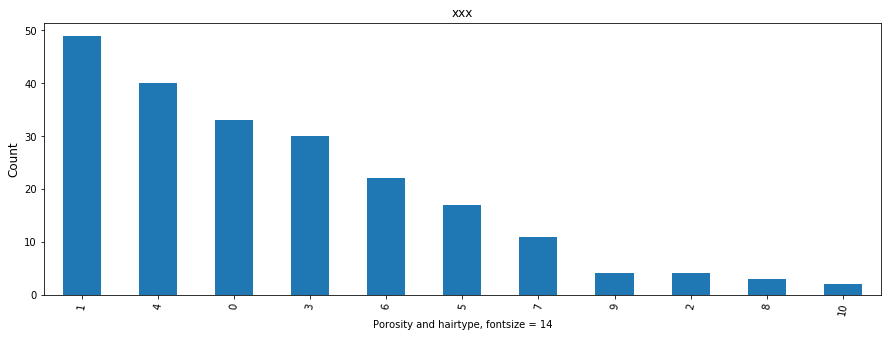

In [35]:
#plt.figure(figsize=(6,4))
age = df.target.value_counts()
age.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Porosity and hairtype, fontsize = 14')


In [36]:
# reference: https://plot.ly/python/line-and-scatter/
regions_dict = {value: i for i,value in enumerate(df.target.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
df = df.applymap(lambda s: regions_dict.get(s) if s in regions_dict.keys() else s)

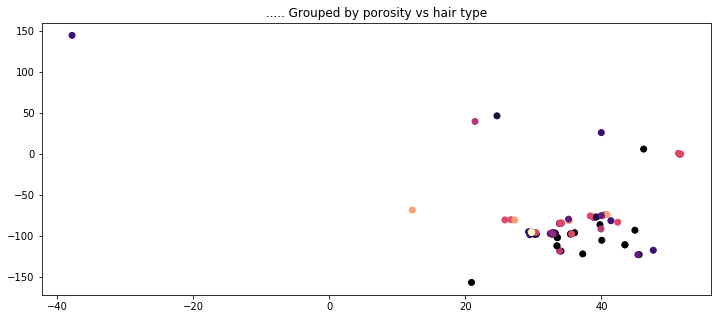

In [37]:
# reference: https://plot.ly/python/line-and-scatter/
plt.figure(figsize=(12, 5))
plt.scatter(df.Latitude, df.Longitude, c = df.target, cmap='magma')
plt.title('..... Grouped by porosity vs hair type')
# plt.legend()
plt.show()

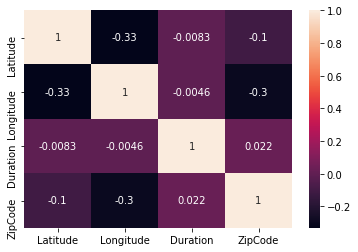

In [38]:
sns.heatmap(df[['Latitude','Longitude','Duration','ZipCode']].corr(),annot=True)
plt.show()

There is no correoation problem at all

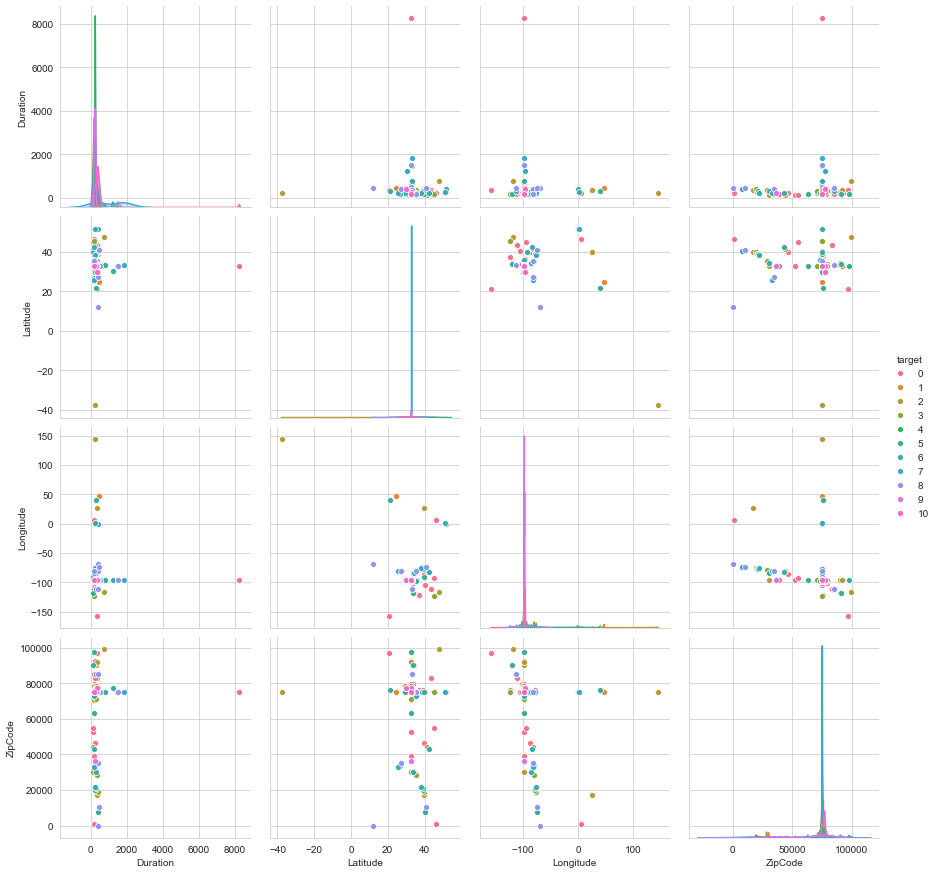

In [39]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='target', height=3)
plt.show()

Text(0.5, 0, 'Age Range, fontsize = 12')

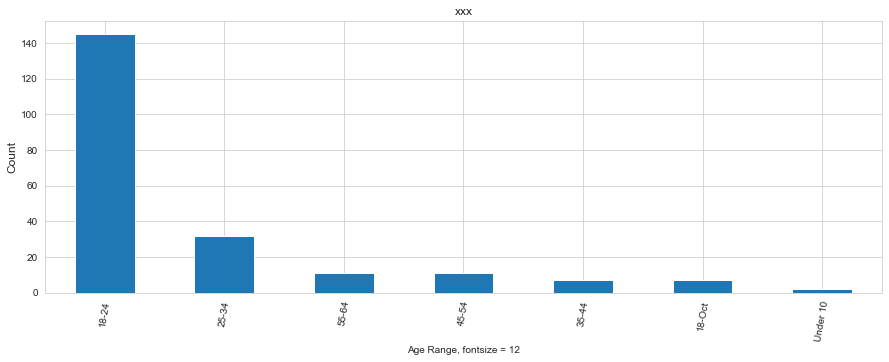

In [40]:
#plt.figure(figsize=(6,4))
age = df.AgeRange.value_counts()
age.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Age Range, fontsize = 12')


Text(0.5, 0, 'Sex')

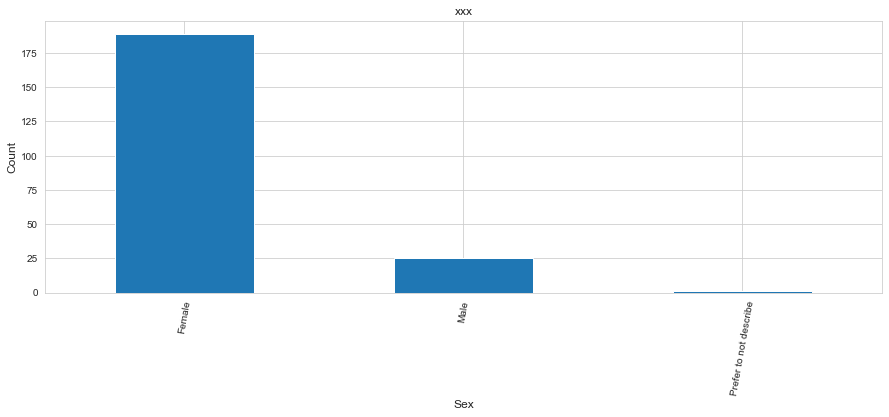

In [41]:
#plt.figure(figsize=(6,4))
sex = df.Sex.value_counts()
sex.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)


Text(0.5, 0, 'Races group')

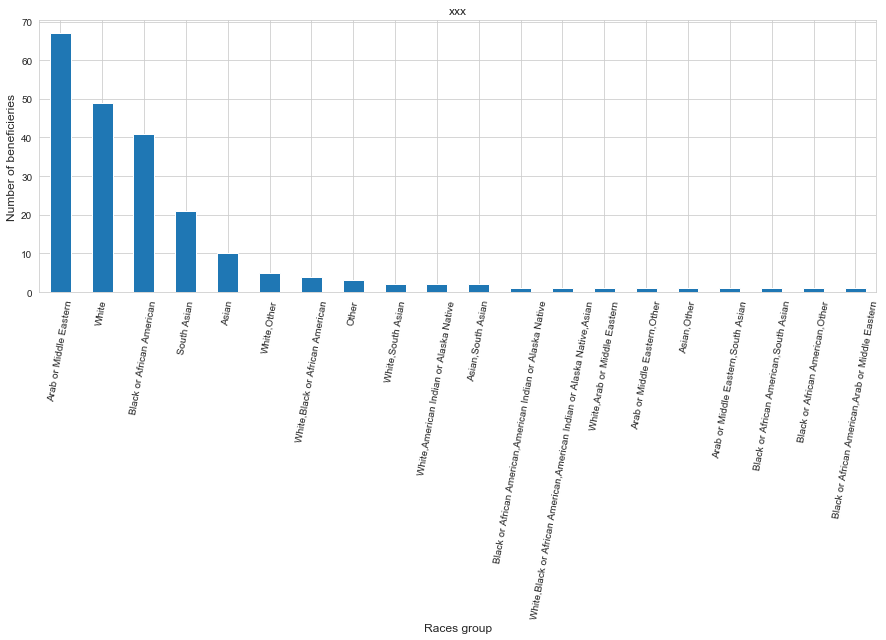

In [42]:
#plt.figure(figsize=(6,4))
races = df.Races.value_counts()
races.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Number of beneficieries', fontsize = 12)
plt.xlabel('Races group', fontsize = 12)

Text(0.5, 0, 'Hair Length group')

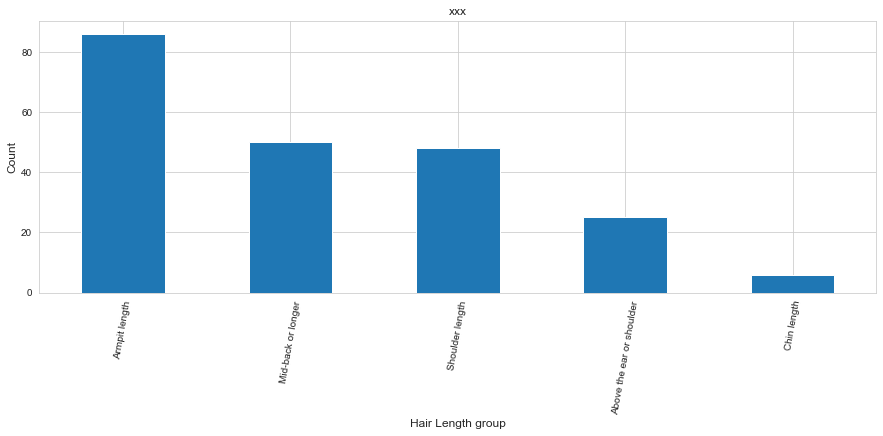

In [43]:
#plt.figure(figsize=(6,4))
Howlonghair = df.HairLength.value_counts()
Howlonghair.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Length group', fontsize = 12)

Text(0.5, 0, 'Hair type group')

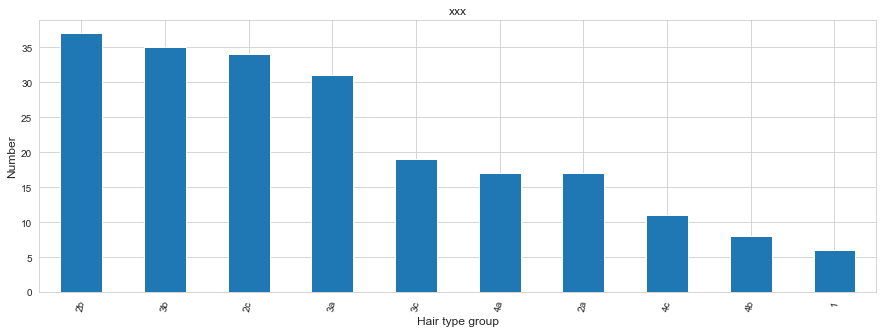

In [44]:
hairtype = df.HairType.value_counts()
hairtype.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Number', fontsize = 12)
plt.xlabel('Hair type group', fontsize = 12)

In [45]:
# Channel = df.Channel.value_counts()
# Channel.plot.bar(figsize = (15, 5), rot = 80)
# plt.title('xxx', fontsize = 12)
# plt.ylabel('Count', fontsize = 12)
# plt.xlabel('Distribution Channel group', fontsize = 12)

Text(0.5, 0, 'Beneficieries Hair Length')

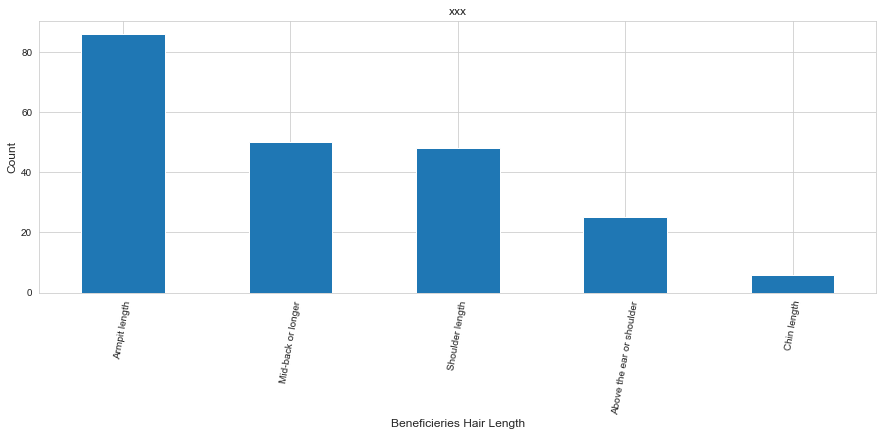

In [46]:
HairLength = df.HairLength.value_counts()
HairLength.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Beneficieries Hair Length', fontsize = 12)

Text(0.5, 0, 'Hair Drying time')

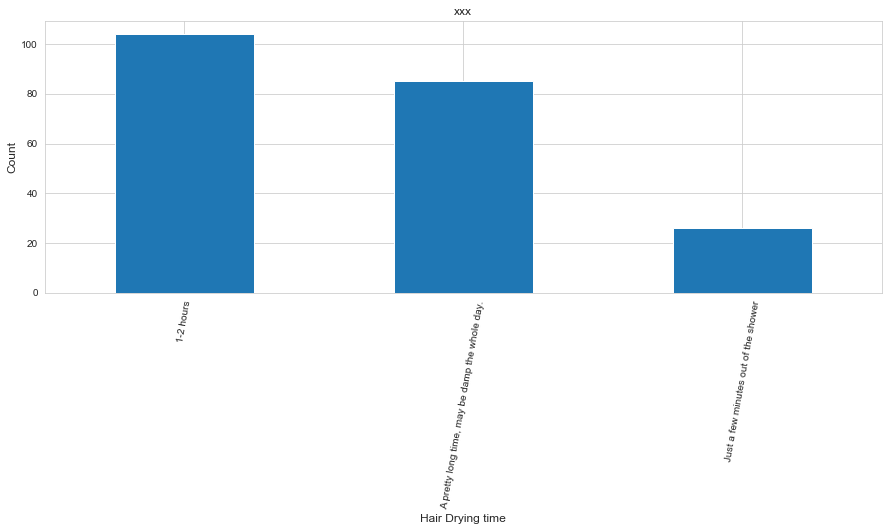

In [47]:
DryingTime = df.DryingTime.value_counts()
DryingTime.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Drying time', fontsize = 12)

Text(0.5, 0, 'The white or yellow flakes frequency')

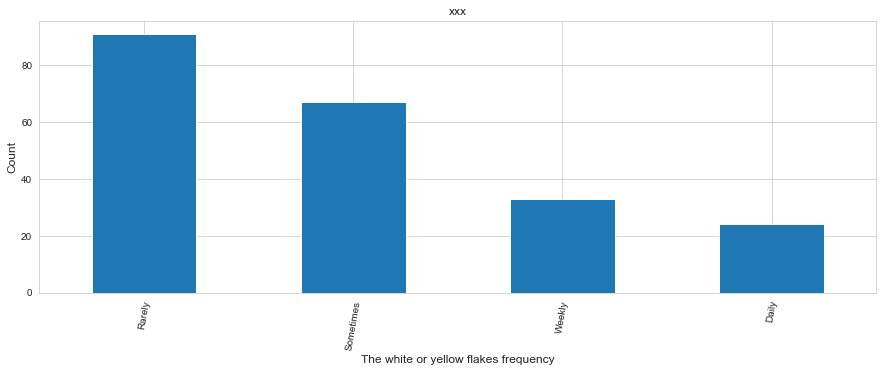

In [48]:
FlakesFrequency = df.FlakesFrequency.value_counts()
FlakesFrequency.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('The white or yellow flakes frequency', fontsize = 12)

Text(0.5, 0, 'Hair type')

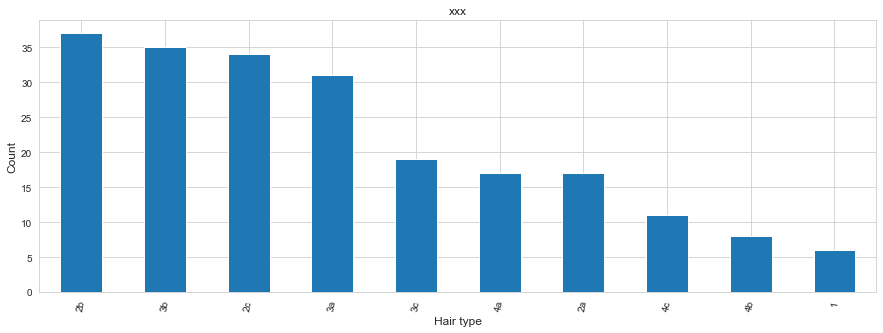

In [49]:
HairType = df.HairType.value_counts()
HairType.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair type', fontsize = 12)

Text(0.5, 0, 'Product Styling group')

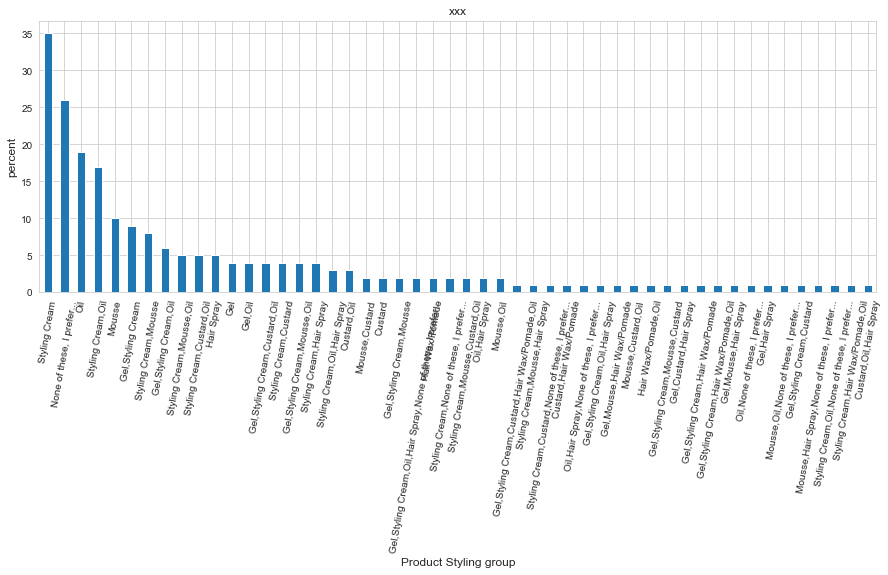

In [50]:
ProductStyling = df.ProductStyling.value_counts()
ProductStyling.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('percent', fontsize = 12)
plt.xlabel('Product Styling group', fontsize = 12)

Text(0.5, 0, 'Scalp feel Wash group')

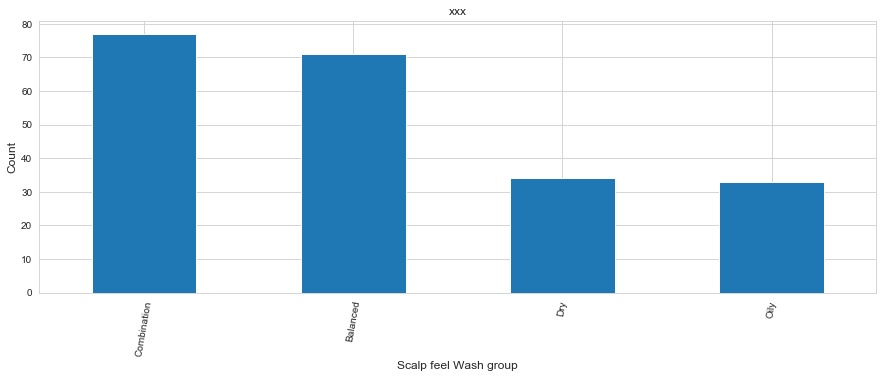

In [51]:
ScalpfeelWash = df.ScalpfeelWash.value_counts()
ScalpfeelWash.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Scalp feel Wash group', fontsize = 12)

Text(0.5, 0, 'Strand group')

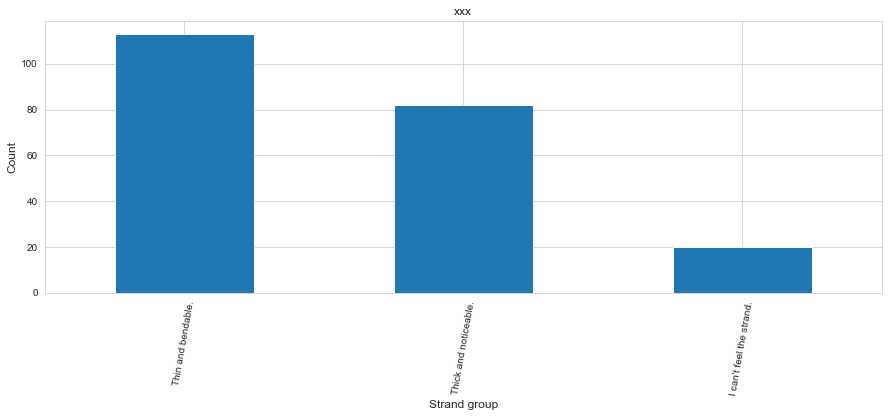

In [52]:
Strand = df.Strand.value_counts()
Strand.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Strand group', fontsize = 12)

Text(0.5, 0, 'Hair Treatment')

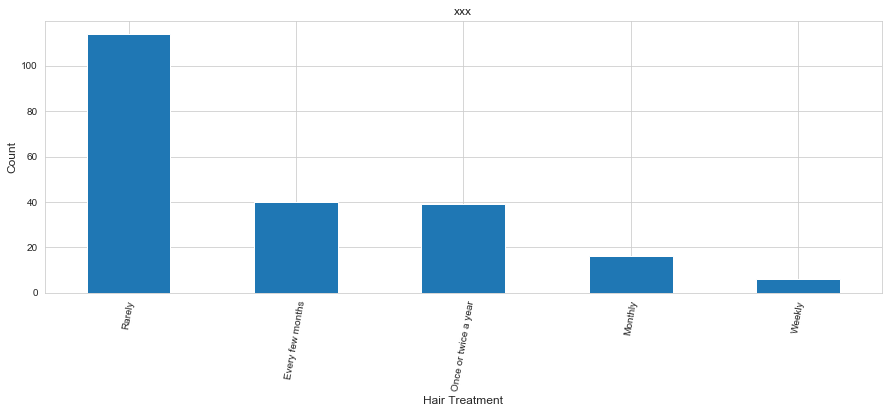

In [53]:
HairTreatment = df.HairTreatment.value_counts()
HairTreatment.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hair Treatment', fontsize = 12)

Text(0.5, 0, 'Product Smell group')

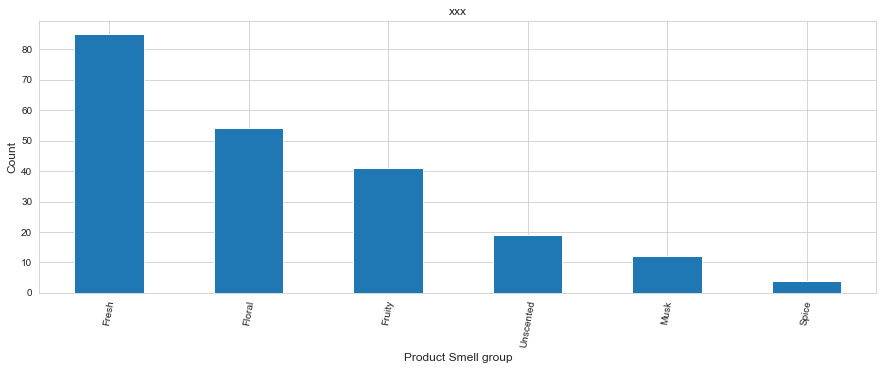

In [54]:
ProductSmell = df.ProductSmell.value_counts()
ProductSmell.plot.bar(figsize = (15, 5), rot = 80)
plt.title('xxx', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Product Smell group', fontsize = 12)

In [56]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         215 non-null    int64  
 1   Latitude         215 non-null    float64
 2   Longitude        215 non-null    float64
 3   HairLength       215 non-null    object 
 4   DryingTime       215 non-null    object 
 5   ScalpNumber      215 non-null    object 
 6   FlakesFrequency  215 non-null    object 
 7   HairType         215 non-null    object 
 8   ProductStyling   215 non-null    object 
 9   HairProblem      215 non-null    object 
 10  ScalpfeelWash    215 non-null    object 
 11  Strand           215 non-null    object 
 12  HairGreyed       215 non-null    object 
 13  HairTreatment    215 non-null    object 
 14  ProductSmell     215 non-null    object 
 15  Races            215 non-null    object 
 16  AgeRange         215 non-null    object 
 17  Sex             

# Type Conversion

In [ ]:
# df['target'] = df['target'].map({'curly_High': 0,
#                                 'curly_Medium' : 1,
#                                 'curly_Low': 2,
#                                 'wavy_High': 3,
#                                 'wavy_Medium' : 4,
#                                 'wavy_Low' : 5, 
#                                 'coils_High': 6, 
#                                 'coils_Medium': 7,
#                                 'coils_Low': 8, 
#                                 'Straight_Medium': 9,
#                                 'Straight_low ': 10,
#                                }).astype(int)



In [ ]:
# df['target'] = df['target'].astype(int, errors='ignore')

In [57]:
df['Duration'] = df['Duration'].astype('float64')
df['ZipCode'] = df['ZipCode'].astype('float64')
df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')
df['HairLength'] = df['HairLength'].astype('category')
df['DryingTime'] = df['DryingTime'].astype('category')
df['FlakesFrequency'] = df['FlakesFrequency'].astype('category')
df['ScalpfeelWash'] = df['ScalpfeelWash'].astype('category')
df['ProductStyling'] = df['ProductStyling'].astype('category')
df['HairProblem'] = df['HairProblem'].astype('category')
df['Strand'] = df['Strand'].astype('category')
df['HairGreyed '] = df['HairGreyed '].astype('category')
df['HairTreatment'] = df['HairTreatment'].astype('category')
df['ProductSmell'] = df['ProductSmell'].astype('category')
df['Races'] = df['Races'].astype('category')
df['AgeRange'] = df['AgeRange'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['HairType'] = df['HairType'].astype('category')
df['Porosity'] = df['Porosity'].astype('category')
#df['target'] = df['target'].astype('category')


In [116]:
# df.info()

In [59]:
from sklearn.preprocessing import StandardScaler
std_scale =  StandardScaler()

In [60]:
df['Duration'] = std_scale.fit_transform(df[['Duration']])
df['Latitude'] = std_scale.fit_transform(df[['Latitude']])
df['Longitude'] = std_scale.fit_transform(df[['Longitude']])
df['ZipCode'] = std_scale.fit_transform(df[['ZipCode']])

In [61]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Duration         215 non-null    float64 
 1   Latitude         215 non-null    float64 
 2   Longitude        215 non-null    float64 
 3   HairLength       215 non-null    category
 4   DryingTime       215 non-null    category
 5   ScalpNumber      215 non-null    object  
 6   FlakesFrequency  215 non-null    category
 7   HairType         215 non-null    category
 8   ProductStyling   215 non-null    category
 9   HairProblem      215 non-null    category
 10  ScalpfeelWash    215 non-null    category
 11  Strand           215 non-null    object  
 12  HairGreyed       215 non-null    category
 13  HairTreatment    215 non-null    category
 14  ProductSmell     215 non-null    category
 15  Races            215 non-null    category
 16  AgeRange         215 non-null    category
 1

###  One Hot Encoding with Pandas

In [62]:
df_dummies = pd.get_dummies(df[['HairLength', 'DryingTime', 'FlakesFrequency', 
                                'HairType', 'ProductStyling', 'HairProblem', 
                                'ScalpfeelWash', 'Strand', 'HairTreatment', 
                                'ProductSmell', 'Races', 
                                'AgeRange', 'Sex', 'Porosity',]])

In [63]:
df = pd.concat([df[['Duration', 'Latitude', 'Longitude', 'ZipCode', 'target']], df_dummies], axis=1)

In [70]:
df.head()

,Duration,Latitude,Longitude,ZipCode,target,HairLength_Above the ear or shoulder,HairLength_Armpit length,HairLength_Chin length,HairLength_Mid-back or longer,HairLength_Shoulder length,...,AgeRange_35-44,AgeRange_45-54,AgeRange_55-64,AgeRange_Under 10,Sex_Female,Sex_Male,Sex_Prefer to not describe,Porosity_High,Porosity_Low,Porosity_Medium
0,-0.200537,-0.088685,-0.200261,0.260613,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.203995,-0.063149,-0.198720,0.260733,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0.229995,-0.058554,-0.202486,0.260733,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.171143,-0.446149,-0.230036,0.325353,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.278344,-0.053120,-0.203126,0.258086,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Building Machine Learning

# Classtering

# Data Analysis

In [71]:
X = df.drop("target", axis=1)
y = df["target"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # 70% training and 30% test

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [76]:
X_train.shape

(150, 309)

In [77]:
X_test.shape

(65, 309)

In [78]:
y_train.shape

(150,)

In [79]:
y_train.shape

(150,)

#### 1. KNN

In [80]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3 , metric='minkowski' , p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
y_pred

array([ 0,  3,  0,  6,  1,  5,  2,  0,  1,  6,  1,  3,  3,  3,  0,  3,  0,
        1,  2,  6,  3,  0,  0,  3,  2,  5,  0,  3,  1,  2,  0, 10,  3,  3,
        6,  2,  0,  2,  2,  3,  0,  3,  2,  0,  5,  2,  0,  5,  2,  0,  6,
        1,  3,  2,  6,  0,  5,  0,  0,  0,  0,  0,  5,  5,  2],
      dtype=int64)

In [82]:
knn_clf = KNeighborsClassifier(n_neighbors = 3 , metric='minkowski' , p=2)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [83]:
y_pred = knn_clf.predict(X_test)

In [84]:
acc_clf = knn_clf.score(X_train,y_train)
print(round(acc_clf*100, 2), "%")

82.0 %


In [95]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[9 0 5 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0]
 [8 0 5 0 1 0 0 0 0]
 [0 0 0 5 2 0 0 0 0]
 [0 0 2 4 5 0 0 0 0]
 [0 0 0 4 0 4 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        14
           1       0.71      1.00      0.83         5
           2       0.38      0.36      0.37        14
           3       0.38      0.71      0.50         7
           5       0.62      0.45      0.53        11
           6       1.00      0.50      0.67         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.51        65
   macro avg       0.40      0.41      0.38        65
weighted avg       0.50      0.51      0.48        65

Accuracy: 0.5076923076923077


In [96]:
cm = confusion_matrix(y_test, y_pred)


### 2. Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [89]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
#print(round(acc_random_forest,2,), "%")

In [90]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

In [91]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86666667 0.8        0.73333333 0.73333333 0.86666667 0.93333333
 0.93333333 0.86666667 0.8        0.86666667]
Mean: 0.8400000000000001
Standard Deviation: 0.06798692684790382


### Feature Importance

### 3. XGBoos Classifier

# Clustering